In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/KDDTest+.txt")
df.shape

(22543, 43)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as display
from sklearn.preprocessing import MinMaxScaler

In [29]:
df=pd.read_csv("/content/KDDTest+.txt")

In [30]:
cols= (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])
df.columns = cols[:len(df.columns)]

In [31]:
print("Number of rows:",len(df))
print("Unique labels:",df['level'].nunique())
print("Top 5 frequent attack types:\n", df['level'].value_counts().head())

Number of rows: 22543
Unique labels: 22
Top 5 frequent attack types:
 level
21    10693
18     2967
20     1343
15     1176
17     1168
Name: count, dtype: int64


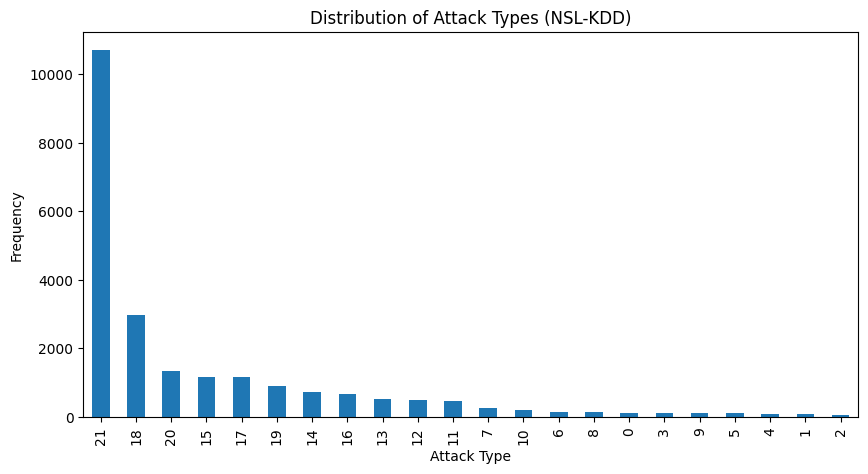

In [32]:
df['level'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title("Distribution of Attack Types (NSL-KDD)")
plt.xlabel("Attack Type")
plt.ylabel("Frequency")
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [34]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [35]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


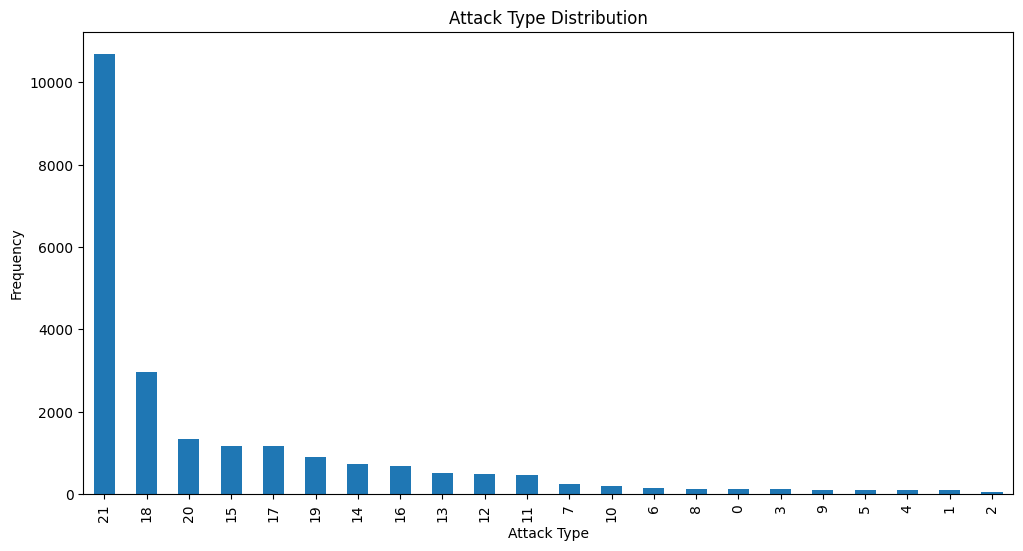

In [36]:
df['level'].value_counts().plot(kind='bar',figsize=(12,6))
plt.title("Attack Type Distribution")
plt.xlabel("Attack Type")
plt.ylabel("Frequency")
plt.show()

In [37]:
print("Missing values ")
print(df.isnull().sum())
print("\n Duplicate Rows :", df.duplicated().sum())

Missing values 
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate              

In [38]:
data=df.fillna(0)
data=data.drop_duplicates()

In [39]:
categorical=["protocol_type","service","flag"]
binary=["land","logged_in","root_shell","su_attempted","is_host_login","is_guest_login"]
numerical=[col for col in df.columns if col not in categorical+binary+['level']]
print("Categorical features:",categorical)
print("Binary features:",binary)
print("Numerical features (first 10):", numerical[:10])

Categorical features: ['protocol_type', 'service', 'flag']
Binary features: ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
Numerical features (first 10): ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations']


In [40]:
scaler=MinMaxScaler()
numerical = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical]=scaler.fit_transform(df[numerical])
numerical_data=df[numerical].head()
print("Data after normalization:\n", numerical_data)

Data after normalization:
    duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0  0.000000  0.000000e+00   0.000000   0.0             0.0     0.0  0.0   
1  0.000035  2.066513e-04   0.000000   0.0             0.0     0.0  0.0   
2  0.000000  3.183413e-07   0.000000   0.0             0.0     0.0  0.0   
3  0.000017  0.000000e+00   0.000011   0.0             0.0     0.0  0.0   
4  0.000000  4.249857e-06   0.010784   0.0             0.0     0.0  0.0   

   num_failed_logins  logged_in  num_compromised  ...  dst_host_srv_count  \
0                0.0        0.0              0.0  ...            0.003922   
1                0.0        0.0              0.0  ...            0.337255   
2                0.0        0.0              0.0  ...            0.223529   
3                0.0        0.0              0.0  ...            0.337255   
4                0.0        1.0              0.0  ...            1.000000   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0     